# Gallery Tests

## Inspecting identify PTMs

In [59]:

from ptm_pose import plots as pose_plots
import pandas as pd

# Load spliced ptm and altered flank data
spliced_ptms = pd.read_csv('spliced_ptms.csv')
altered_flanks = pd.read_csv('altered_flanks.csv')

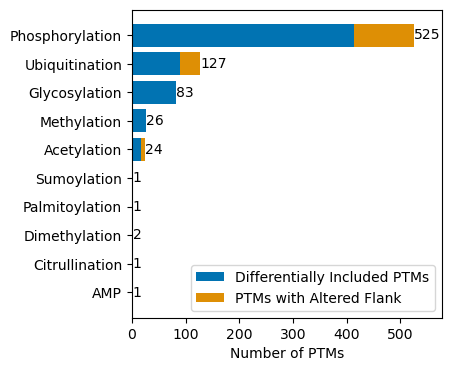

In [70]:
pose_plots.modification_breakdown(spliced_ptms = spliced_ptms, altered_flanks = altered_flanks)

## Inspecting number of PTMs with annotation information available

In [1]:

from ptm_pose import analyze
import pandas as pd

# Load spliced ptm and altered flank data
spliced_ptms = pd.read_csv('spliced_ptms.csv')
altered_flanks = pd.read_csv('altered_flanks.csv')
combined_output = analyze.combine_outputs(spliced_ptms, altered_flanks)

Some annotations in spliced ptms dataframe not found in altered flanks dataframe. These annotations will be ignored. To avoid this, make sure to add annotations to both dataframes, or annotate the combined dataframe.


In [3]:
analyze.show_available_annotations(spliced_ptms)

AttributeError: module 'ptm_pose.analyze' has no attribute 'show_available_annotations'

## Inspecting Specific Annotation

Often, we will want to dig deeper into the specific functions, processes, interactions, etc. associated with the proteins in our dataset. First, we can look at the annotations currently available for analysis, based on annotations that have been appended using the annotate module:

In [4]:
from ptm_pose import analyze
from ptm_pose import plots as pose_plots
import pandas as pd

# Load spliced ptm and altered flank data
spliced_ptms = pd.read_csv('spliced_ptms.csv')
altered_flanks = pd.read_csv('altered_flanks.csv')
combined_output = analyze.combine_outputs(spliced_ptms, altered_flanks)

annot_categories = analyze.get_annotation_categories(combined_output)
annot_categories

Some annotations in spliced ptms dataframe not found in altered flanks dataframe. These annotations will be ignored. To avoid this, make sure to add annotations to both dataframes, or annotate the combined dataframe.


,database,annotation_type,column
5,Combined,Interactions,Combined:Interactions
8,Combined,Kinase,Combined:Kinase
1,DEPOD,Phosphatase,DEPOD:Phosphatase
2,ELM,Interactions,ELM:Interactions
0,PhosphoSitePlus,Interactions,PSP:ON_PROT_INTERACT
3,PhosphoSitePlus,Disease,PSP:Disease_Association
4,PhosphoSitePlus,Process,PSP:ON_PROCESS
6,PhosphoSitePlus,Function,PSP:ON_FUNCTION
7,RegPhos,Kinase,RegPhos:Kinase


This will tell us what database information is available, the types of information from that database, and the column associated with that information. Let's take a closer look at the biological process information from PhosphoSitePlus:

In [5]:
ptms_with_annotation, annotation_counts = analyze.get_ptm_annotations(spliced_ptms, database = "PhosphoSitePlus", annotation_type = 'Process')
print('Specific PTMs with annotation:')
ptms_with_annotation

Specific PTMs with annotation:


,Gene,UniProtKB Accession,Residue,PTM Position in Canonical Isoform,Modification Class,PSP:ON_PROCESS,dPSI,Significance,Impact
0,BCAR1,P56945,Y,267.0,Phosphorylation,"cell growth, induced",-0.07,0.0458775672499,Excluded
1,BCAR1,P56945,Y,287.0,Phosphorylation,"cell growth, induced",-0.07,0.0458775672499,Excluded
2,BIN1,O00499,T,348.0,Phosphorylation,signaling pathway regulation,-0.112,0.0233903490744,Excluded
3,CEACAM1,P13688,S,461.0,Phosphorylation,"apoptosis, altered",0.525,1.73943268451e-09,Included
4,CTTN,Q14247,K,272.0,Acetylation,"cell motility, inhibited",0.09,0.0355211287599,Included
5,CTTN,Q14247,S,298.0,Phosphorylation,"cell motility, altered; cytoskeletal reorganiz...",0.09,0.0355211287599,Included
6,SPHK2,Q9NRA0,S,387.0,Phosphorylation,"cell motility, altered",0.253,0.0129400018182,Included
7,SPHK2,Q9NRA0,T,614.0,Phosphorylation,"cell motility, altered",0.253,0.0129400018182,Included
8,TSC2,P49815,S,981.0,Phosphorylation,"carcinogenesis, inhibited; cell growth, inhibi...",-0.219,4.18472157275e-05,Excluded
9,YAP1,P46937,K,342.0,Ubiquitination,"carcinogenesis, altered",-0.188;-0.161,0.000211254197372;4.17884655686e-07,Excluded


From this, we note a total of 9 impacted PTMs from 7 genes that have biological process information available. While we could manually look through to look for common processes, we can also inspect the annotation counts object to see the most common processes, including a breakdown by the type of impact (included [dPSI > 0], excluded [dPSI < 0], or altered flanking sequence):

In [6]:
print('Number of PTMs associated with each annotation:')
annotation_counts

Number of PTMs associated with each annotation:


,All Impacted,Included,Excluded,Altered Flank
PSP:ON_PROCESS,,,,
"cell motility, altered",3,3.0,0.0,0.0
"cell growth, induced",2,0.0,2.0,0.0
signaling pathway regulation,2,0.0,2.0,0.0
"apoptosis, altered",1,1.0,0.0,0.0
"cell motility, inhibited",1,1.0,0.0,0.0
cytoskeletal reorganization,1,1.0,0.0,0.0
"cell adhesion, inhibited",1,1.0,0.0,0.0
"carcinogenesis, inhibited",1,0.0,1.0,0.0
"cell growth, inhibited",1,0.0,1.0,0.0


Finally, you may prefer to visualize this information as a figure. Here, we can plot the top 10 most common biological processes for the included, excluded, and altered flanking sequence impacts. Notably, we can plot either the annotations as outputted above (includes directionality of PTM role) or we can collapse this information into similar groups (e.g. "cell motility, altered" and "cell motility, included" would be grouped as "cell motility"). Here, we will plot the full information on the left and the collapsed information on the right:

Text(0.5, 1.0, 'Collapsed Annotation')

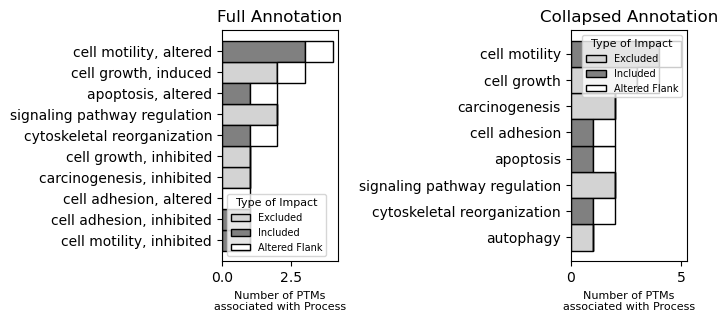

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols = 2, figsize = (6, 3))
fig.subplots_adjust(wspace = 2)
pose_plots.plot_annotations(combined_output, ax = ax[0], collapse_on_similar = False, database = 'PhosphoSitePlus', annot_type = 'Process', top_terms = 10)
ax[0].set_title('Full Annotation')
pose_plots.plot_annotations(combined_output, ax = ax[1], collapse_on_similar = True, database = 'PhosphoSitePlus', annot_type = 'Process', top_terms = 10)
ax[1].set_title('Collapsed Annotation')

Of note, you can also choose to only show collapsed annotation information for `analyze.get_ptm_annotations()` by setting `collapse_on_similar=True` in the function call, like we have done for the plot on the right.

## Annotation Enrichment Analysis

In some cases, you may want to identify PTM-specific annotations that appear more commonly than might be expected based on how often the annotation appears across the entire proteome. We have provided a function to perform this analysis, `analyze.ptm_annotation_enrichment()`. By default, this function will compare the annotations found in your data to the annotations found in the entire proteome (based on ptm_coordinates dataframe), but you can also choose to perform enrichment analysis by significance. Here, we will we perform enrichment analysis using the entire proteome as the background. First, let's look at the available annotations for enrichment analysis:

In [3]:

from ptm_pose import analyze
import pandas as pd

# Load spliced ptm and altered flank data
spliced_ptms = pd.read_csv('spliced_ptms.csv')
altered_flanks = pd.read_csv('altered_flanks.csv')
combined_output = analyze.combine_outputs(spliced_ptms, altered_flanks)

annot_categories = analyze.get_annotation_categories(combined_output)
annot_categories

Some annotations in spliced ptms dataframe not found in altered flanks dataframe. These annotations will be ignored. To avoid this, make sure to add annotations to both dataframes, or annotate the combined dataframe.


,database,annotation_type,column
4,Combined,Interactions,Combined:Interactions
5,Combined,Kinase,Combined:Kinase
2,DEPOD,Phosphatase,DEPOD:Phosphatase
3,ELM,Interactions,ELM:Interactions
0,PhosphoSitePlus,Process,PSP:ON_PROCESS
1,PhosphoSitePlus,Interactions,PSP:ON_PROT_INTERACT
6,PhosphoSitePlus,Disease,PSP:Disease_Association
8,PhosphoSitePlus,Function,PSP:ON_FUNCTION
7,RegPhos,Kinase,RegPhos:Kinase


We would like to know if the PTMs have been implicated in any biological processes more than expected by chance. We can perform enrichment analysis on the biological process annotations from PhosphoSitePlus. To maximize the ability of the hypergeometric test to capture these results, we will use the collapsed annotation information (ignores directionality of PTM role):

In [4]:
enrichment = analyze.annotation_enrichment(combined_output, database = 'PhosphoSitePlus', annotation_type = 'Process', collapse_on_similar=True)
enrichment

Using pregenerated background information on all PTMs in the proteome.


,Fraction Impacted,p-value,Adjusted p-value,PTM
PSP:ON_PROCESS,,,,
cell motility,5/1078,0.052579,0.420633,ABI1_S392;CTTN_K272;CTTN_S298;SPHK2_S387;SPHK2...
cell adhesion,2/324,0.122466,0.489864,CTTN_S298;MPZL1_Y241
cell growth,4/1793,0.427134,1.000000,BCAR1_Y267;BCAR1_Y287;BCAR1_Y306;TSC2_S981
autophagy,1/306,0.434215,0.868429,TSC2_S981
cytoskeletal reorganization,2/796,0.435637,0.868429,ABI1_S392;CTTN_S298
apoptosis,2/1179,0.644065,0.868429,CEACAM1_S461;CEACAM1_T457
signaling pathway regulation,2/1206,0.656208,0.868429,BIN1_T348;TSC2_S981
carcinogenesis,2/1501,0.768091,0.868429,TSC2_S981;YAP1_K342


We can also plot the annotations and include which annotations are enriched (p-value < 0.05) in the plot:

In [ ]:


print('not yet implemented')

## Gene Set Enrichment Analysis

In addition to looking at the annotations associated with the PTMs, we can also look at the genes themselves with impacted PTMs. We can perform gene set enrichment analysis using EnrichR module of gseapy to identify if any gene sets are enriched in the PTM dataset, as well as break it down by the type of modication. Here, we will use the `analyze.gene_set_enrichment()` function to perform this analysis. First, let's look at the available gene sets for enrichment analysis:

In [1]:
from ptm_pose import analyze
import pandas as pd

# Load spliced ptm and altered flank data
spliced_ptms = pd.read_csv('spliced_ptms.csv')
altered_flanks = pd.read_csv('altered_flanks.csv')
combined_output = analyze.combine_outputs(spliced_ptms, altered_flanks)

Some annotations in spliced ptms dataframe not found in altered flanks dataframe. These annotations will be ignored. To avoid this, make sure to add annotations to both dataframes, or annotate the combined dataframe.


In [2]:
enrichr_results = analyze.gene_set_enrichment(combined = combined_output, gene_sets = ['GO_Biological_Process_2023', 'Reactome_2022'])

In [3]:
enrichr_results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,Type,Genes with Differentially Included PTMs only,Genes with PTM with Altered Flanking Sequence only,Genes with Both
0,GO_Biological_Process_2023,Regulation Of Neurogenesis (GO:0050767),5/67,0.000018,0.011675,0,0,17.392181,189.619722,YAP1;APLP2;DOCK7;NUMB;NF2,Differentially Included + Altered Flanking Seq...,YAP1;APLP2,NF2,DOCK7;NUMB
1,GO_Biological_Process_2023,Enzyme-Linked Receptor Protein Signaling Pathw...,6/124,0.000031,0.011675,0,0,11.055131,114.642865,CSF1;FGFR3;FGFR2;PTPRF;BCAR1;MPZL1,Differentially Included + Altered Flanking Seq...,FGFR2;CSF1;FGFR3,,MPZL1;BCAR1;PTPRF
2,GO_Biological_Process_2023,Protein Localization To Cell-Cell Junction (GO...,3/15,0.000048,0.011675,0,0,52.901596,525.813416,TJP1;LSR;SCRIB,Differentially Included + Altered Flanking Seq...,,LSR,SCRIB;TJP1
3,GO_Biological_Process_2023,Regulation Of Cell Migration (GO:0030334),10/434,0.000049,0.011675,0,0,5.280579,52.425684,TJP1;CEACAM1;CSF1;ADAM15;LIMCH1;APLP2;NUMB;ITG...,Differentially Included + Altered Flanking Seq...,APLP2;CSF1;ITGA6,NF2,ADAM15;NUMB;LIMCH1;BCAR1;TJP1;CEACAM1
4,GO_Biological_Process_2023,Integrin-Mediated Signaling Pathway (GO:0007229),5/85,0.000058,0.011675,0,0,13.466712,131.282293,CEACAM1;ADAM15;ITGA6;CD47;BCAR1,Differentially Included + Altered Flanking Seq...,ITGA6;CD47,,ADAM15;CEACAM1;BCAR1


The result is the standard output of gseapy, with the specific genes in the gene set with differentially include or altered flanking sequence PTM sites listed. We can also plot the output of the gene set enrichment analysis:

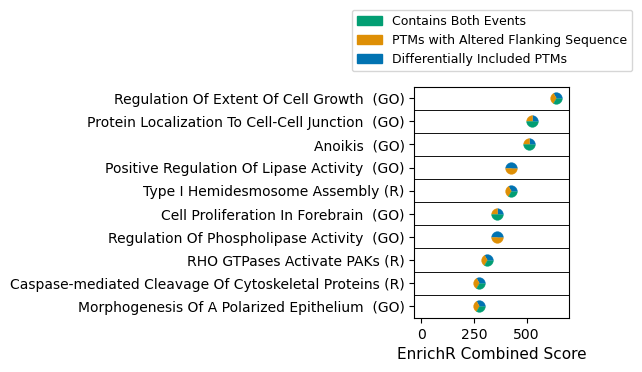

In [4]:
from ptm_pose import plots as pose_plots

pose_plots.plot_EnrichR_pies(enrichr_results, top_terms = 10)

## Protein Interaction Networks

In [1]:
from ptm_pose import analyze
import pandas as pd

# Load spliced ptm and altered flank data
spliced_ptms = pd.read_csv('spliced_ptms.csv')

In [10]:
interaction_graph, network_data = analyze.get_interaction_network(spliced_ptms, node_type = 'Gene')
network_stats = analyze.get_interaction_stats(interaction_graph)

PhosphoSitePlus regulatory site data found and added
Combined kinase-substrate data found and added
PTMInt data found and added
ELM data found and added


In [20]:
network_data.head()

,Modified Gene,Interacting Gene,Residue,Type,Source,dPSI,Regulation Change
0,ADAM15,HCK,Y735;Y715,REGULATES,PSP/RegPhos,0.181;-0.052,+;-
1,ADAM15,LCK,Y715,REGULATES,PSP/RegPhos,0.181;-0.052,+;-
2,ADAM15,SRC,Y735;Y715,REGULATES,PSP/RegPhos,0.181;-0.052,+;-
3,BCAR1,SRC,Y267;Y287,REGULATES,PSP/RegPhos,-0.07,-
4,BIN1,MAPT,T348,INDUCES,PhosphoSitePlus;PTMInt,-0.112,-


In [24]:
import importlib
importlib.reload(analyze)

<module 'ptm_pose.analyze' from 'C:\\Users\\Sam\\OneDrive\\Documents\\GradSchool\\Research\\Splicing\\PTM_POSE\\ptm_pose\\analyze.py'>

In [25]:
analyze.summarize_protein_network(protein = 'TSC2', interaction_graph = interaction_graph, network_data = network_data, network_stats = network_stats)

Decreased interaction likelihoods: AKT1, YWHAE, YWHAZ
Number of interactions: 3 (Rank: 2)
Centrality measures - 	 Degree = 0.2 (Rank: 2)
                      	 Betweenness = 0.028571428571428574 (Rank: 3)
                      	 Closeness = 0.2 (Rank: 3)


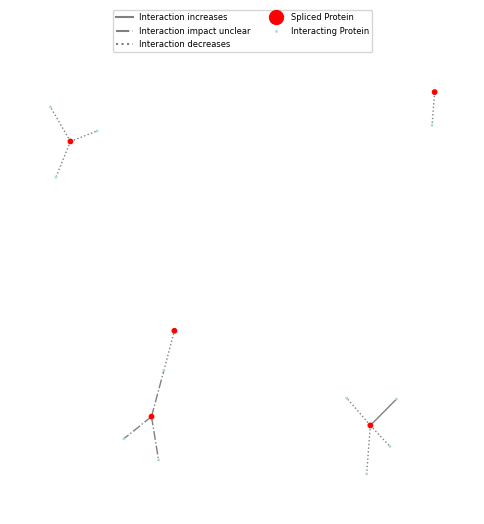

In [17]:
pose_plots.plot_interaction_network(interaction_graph, network_data, network_stats = network_stats)

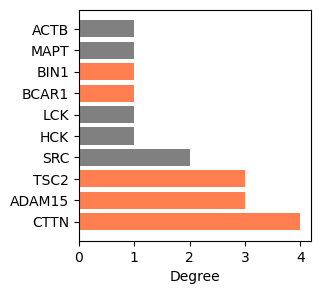

In [13]:
from ptm_pose import plots as pose_plots

network_stats = analyze.get_interaction_stats(interaction_graph)
pose_plots.plot_network_centrality(network_stats, network_data, top_N = 10, modified_color = 'coral', interacting_color = 'grey')

## KSTAR Analysis

While we provide functions for performing enrichment of known kinase substrates from databases like PhosphoSitePlus, RegPhos, and PTMsigDB, these resources are limited by the overall number of validated substrates (<5%). For this purpose, we have adapted a previously developed algorithm called KSTAR (Kinase Substrate to Activity Relationships) for use with spliced PTM data, which harnesses kinase-substrate predictions to expand the overall number of phosphorylation sites that can be used as evidence. This particularly important as you may find many of the spliced PTMs in your dataset are less well studied and may not have any annotated kinases.

In order to perform KSTAR analysis, you will first need to download KSTAR networks from the following [figshare](https://figshare.com/articles/dataset/NETWORKS/14944305?file=28768155).

Once you have downloaded the networks, all you need is your PTM data.

In [2]:
from ptm_pose import analyze
import pandas as pd

# Load spliced ptm and altered flank data
spliced_ptms = pd.read_csv('spliced_ptms.csv')

In [30]:
kstar_enrichment = analyze.kstar_enrichment(spliced_ptms, network_dir = '../../../../Database_Information/NETWORKS/NetworKIN/', phospho_type = 'Y')
kstar_enrichment.run_kstar_enrichment()
kstar_enrichment.return_enriched_kinases()

You can also run the same analysis for serine/threonine kinases:

In [34]:
kstar_enrichment = analyze.kstar_enrichment(spliced_ptms, network_dir = '../../../../Database_Information/NETWORKS/NetworKIN/', phospho_type = 'ST')
kstar_enrichment.run_kstar_enrichment()
kstar_enrichment.return_enriched_kinases()

array(['PRKG2', 'MAPK14', 'PRKCH', 'PRKCG', 'PRKD1', 'PRKCE', 'ROCK1',
       'TTK'], dtype=object)

## Flanking Sequence Analysis

### Location of altered flanks

In [72]:
from ptm_pose import flanking_sequences as fs
import pandas as pd

# Load altered flank data
altered_flanks = pd.read_csv('altered_flanks.csv')

In [73]:
altered_flanks = fs.compare_flanking_sequences(altered_flanks)
altered_flanks[['UniProtKB Accession', 'Residue', 'PTM Position in Canonical Isoform', 'Modification Class', 'Inclusion Sequence', 'Exclusion Sequence', 'Sequence Identity', 'Altered Positions', 'Residue Change', 'Altered Flank Side']].head()

,UniProtKB Accession,Residue,PTM Position in Canonical Isoform,Modification Class,Inclusion Sequence,Exclusion Sequence,Sequence Identity,Altered Positions,Residue Change,Altered Flank Side
0,P01116,T,148,Phosphorylation,ETSAKtRQESG,ETSAKtRQGC*,NaN,NaN,NaN,NaN
1,P01116,K,147,Acetylation,IETSAkTRQES,IETSAkTRQGC,0.818182,"[4.0, 5.0]","[E->G, S->C]",C-term only
2,P01116,K,147,Ubiquitination,IETSAkTRQES,IETSAkTRQGC,0.818182,"[4.0, 5.0]","[E->G, S->C]",C-term only
3,Q9UPQ0,S,746,Phosphorylation,LPNLNsQGVAW,LPNLNsQGGFS,0.727273,"[3.0, 4.0, 5.0]","[V->G, A->F, W->S]",C-term only
4,Q9UPQ0,S,750,Phosphorylation,PSQVDsPSSEK,ILKVDsPSSEK,0.727273,"[-5.0, -4.0, -3.0]","[P->I, S->L, Q->K]",N-term only


Note, we only calculate these metrics for cases where altered flanking sequences do not cause a stop codon to be introduced, as this is harder to interpret (such as for the first PTM in the list). The above table will indicate the positions in the flanking sequence that are altered, how similar the altered flanking sequence is to the original flanking sequence, and the specific residue change that takes place. We can also plot some of this information to get a better sense of the distribution of altered flanking sequences:

In [47]:
importlib.reload(pose_plots)

<module 'ptm_pose.plots' from 'C:\\Users\\Sam\\OneDrive\\Documents\\GradSchool\\Research\\Splicing\\PTM_POSE\\ptm_pose\\plots.py'>

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\Splicing\PTM_POSE\ptm_pose\plots.py:391: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['N-term\nonly', 'C-term\nonly'])


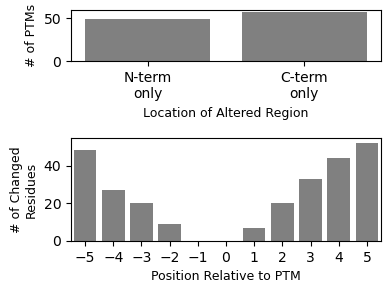

In [48]:
from ptm_pose import plots as pose_plots

pose_plots.location_of_altered_flanking_residues(altered_flanks)

We can even create the same plot for specific modification types or residues, as well as label the specific residue changes that occur:

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\Splicing\PTM_POSE\ptm_pose\plots.py:437: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['N-term\nonly', 'C-term\nonly'])


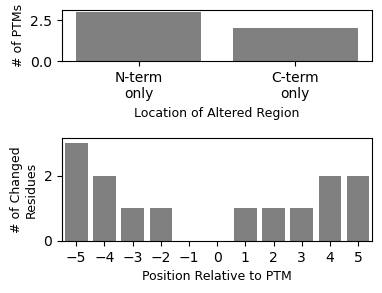

In [76]:
pose_plots.location_of_altered_flanking_residues(altered_flanks, modification_class='Acetylation')

If we want to dig deeper, we can look at the specific changes that occurring, although this is only recommended with a selected subset of PTMs, such as those that may have a functional impact:

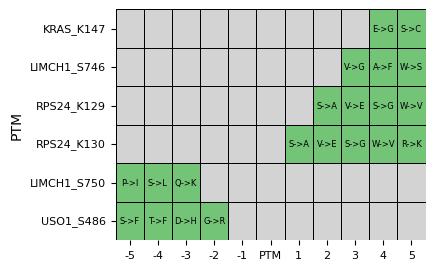

In [102]:
pose_plots.alterations_matrix(altered_flanks.head(10))

In [119]:
importlib.reload(analyze)

<module 'ptm_pose.analyze' from 'C:\\Users\\Sam\\OneDrive\\Documents\\GradSchool\\Research\\Splicing\\PTM_POSE\\ptm_pose\\analyze.py'>

In [120]:
altered_flanks = analyze.compare_inclusion_motifs(altered_flanks)

In [126]:
sh2_motif_changes = analyze.identify_change_to_specific_motif(altered_flanks, elm_motif_name = '14-3-3', modification_class = 'Phosphorylation', residues = ['S','T'])

In [127]:
sh2_motif_changes

,Gene,UniProtKB Accession,Residue,PTM Position in Canonical Isoform,Modification Class,Inclusion Sequence,Exclusion Sequence,Motif only in Inclusion,Motif only in Exclusion,Altered Positions,Residue Change
22,MLPH,Q9BV36,S,337,Phosphorylation,RGRASsESQDL,RGRASsESQGS,LIG_14-3-3_CanoR_1,NaN,"[4.0, 5.0]","[D->G, L->S]"
23,MLPH,Q9BV36,S,339,Phosphorylation,RASSEsQDL*A,RASSEsQGSRC,LIG_14-3-3_CanoR_1,NaN,NaN,NaN
50,CEACAM1,P13688,T,457,Phosphorylation,LHFGKtGRGKR,LHFGKtGRLRT,NaN,LIG_14-3-3_CterR_2,"[3.0, 4.0, 5.0]","[G->L, K->R, R->T]"
67,ENAH,Q8N8S7,S,512,Phosphorylation,KSPVIsRTGFS,KSPVIsRTKIH,LIG_14-3-3_CterR_2,NaN,"[3.0, 4.0, 5.0]","[G->K, F->I, S->H]"
93,LMO7,Q8WWI1-3,S,356,Phosphorylation,ADGTFsRTLSK,ADGTFsRE*VH,LIG_14-3-3_CterR_2,NaN,NaN,NaN
129,MAP3K7,O43318,T,403,Phosphorylation,RIAATtGLFQA,RIAATtGQRTA,LIG_14-3-3_CanoR_1,NaN,"[2.0, 3.0, 4.0]","[L->Q, F->R, Q->T]"
141,LMO7,Q8WWI1-3,T,354,Phosphorylation,TEADGtFSR*S,TEADGtFSRE*,LIG_14-3-3_CterR_2,NaN,NaN,NaN


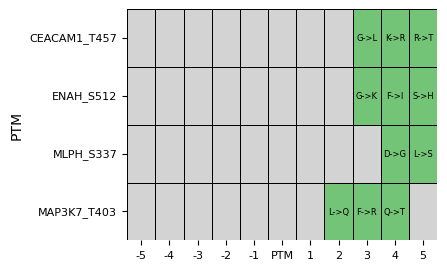

In [128]:
pose_plots.alterations_matrix(sh2_motif_changes)

## Plot Event